### Apakah Halaman Website yang Baru Akan Meningkatkan Tingkat Konversi?

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# import dataset
data = pd.read_csv('D:\PYTHON\LATIHAN\Pacmann\Data Source/ab_test.csv')
data.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [3]:
# ringkasan dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# jumlah missing values
data.isna().sum()

id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64

In [5]:
# jumlah baris duplikat
data['id'].duplicated().sum()

3894

In [6]:
# menampilkan data duplikat
data.loc[data['id'].duplicated() == True]

,id,time,con_treat,page,converted
2656,698120,13:42.6,control,old_page,0
2893,773192,55:59.6,treatment,new_page,0
7500,899953,06:54.1,control,new_page,0
8036,790934,32:20.3,treatment,new_page,0
10218,633793,16:00.7,treatment,old_page,0
...,...,...,...,...,...
294308,905197,56:47.5,treatment,new_page,0
294309,787083,15:21.0,control,old_page,0
294328,641570,59:27.7,control,old_page,0
294331,689637,34:28.3,control,new_page,0


Terdapat anomali data: 
- Kelompok `control` seharusnya hanya diberikan halaman web yang lama (old_page)
- Kelompok `treatment` seharusnya hanya diberikan halaman web yang baru (new_page)

In [7]:
# statistik deskriptif
data_descriptive = data.loc[(data['con_treat'] == 'control') & (data['page'] == 'old_page')
                           | (data['con_treat'] == 'treatment') & (data['page'] == 'new_page')]

data_descriptive

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


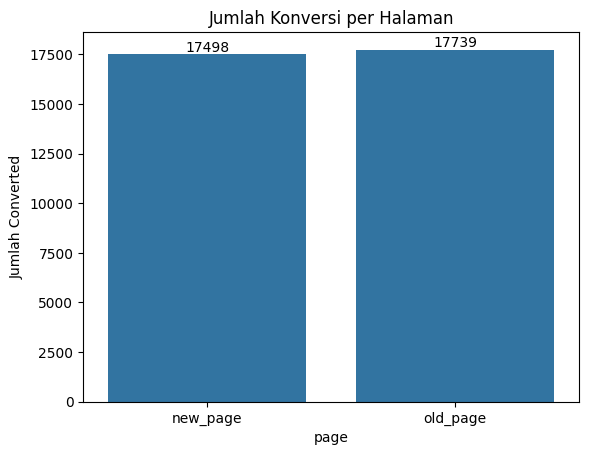

In [8]:
# Jumlah konversi masing-masing halaman web
conversion_counts = data[data['converted'] == 1].groupby('page').size().reset_index(name='count')

# Plot
ax = sns.barplot(data=conversion_counts, x='page', y='count')
plt.title('Jumlah Konversi per Halaman')
plt.ylabel('Jumlah Converted')

for i, row in conversion_counts.iterrows():
    ax.text(i, row['count'], f"{row['count']}", ha='center', va='bottom')

plt.show()

In [9]:
# pisahkan control_data
control_data = data.loc[(data['con_treat'] == 'control') & (data['page'] == 'old_page')]
control_data

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0
...,...,...,...,...,...
294471,718310,44:20.4,control,old_page,0
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0


In [10]:
# pisahkan treatment_data
treatment_data = data.loc[(data['con_treat'] == 'treatment') & (data['page'] == 'new_page')]
treatment_data

,id,time,con_treat,page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1
...,...,...,...,...,...
294462,677163,41:51.9,treatment,new_page,0
294465,925675,38:26.3,treatment,new_page,0
294468,643562,20:05.5,treatment,new_page,0
294472,822004,36:46.1,treatment,new_page,0


In [11]:
# cek duplikasi pada dataframe control_data
control_data.loc[control_data['id'].duplicated()==True]

,id,time,con_treat,page,converted


In [12]:
# cek duplikasi pada dataframe treatment_data
treatment_data.loc[treatment_data['id'].duplicated()==True]

,id,time,con_treat,page,converted
2893,773192,55:59.6,treatment,new_page,0


In [13]:
# cek baris
treatment_data.loc[treatment_data['id'] == 773192]

,id,time,con_treat,page,converted
1899,773192,37:58.8,treatment,new_page,0
2893,773192,55:59.6,treatment,new_page,0


In [14]:
# hapus data duplikat yang terbaru
treatment_data.drop_duplicates(subset='id', keep = 'first', inplace=True)
treatment_data.loc[treatment_data['id'] == 773192]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24760\1418915724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_data.drop_duplicates(subset='id', keep = 'first', inplace=True)


,id,time,con_treat,page,converted
1899,773192,37:58.8,treatment,new_page,0


**Definisikan Null dan Alternatif Hipotesis**

- **Apa yang ingin dibuktikan**: Rasio konversi atau proporsi konversi dari pengguna yang mendarat di **halaman baru** lebih besar daripada halaman **lama**.

- Misalkan $p_1$ adalah proporsi konversi dari pengguna yang mendarat di **halaman baru**, dan $p_2$ adalah proporsi konversi dari pengguna yang mendarat di **halaman lama**.

  - $H_0$: Probabilitas semua pengguna yang melakukan konversi dari halaman baru **kurang dari atau sama dengan** probabilitas konversi dari halaman lama.
    $$H_0: P_1 \leq P_2$$

- **Hipotesis alternatif ($H_1$)** adalah klaim yang berlawanan dengan hipotesis nol:
  - $H_1$: Probabilitas semua pengguna yang melakukan konversi dari halaman baru **lebih besar** daripada probabilitas konversi dari halaman lama.
    $$H_1: P_1 > P_2$$

- **Tingkat signifikansi (alpha)**:
  - Tingkat signifikansi = 0.05

In [15]:
# Jumlah konversi dalam observasi
converted_from_old_page_cond = (control_data['page'] == 'old_page') & (control_data['converted'] == 1)
converted_from_new_page_cond = (treatment_data['page'] == 'new_page') & (treatment_data['converted'] == 1)

converted_from_old_page_data = control_data[converted_from_old_page_cond]
converted_from_new_page_data = treatment_data[converted_from_new_page_cond]

converted_old = len(converted_from_old_page_data)
converted_new = len(converted_from_new_page_data)

In [16]:
# Jumlah observasi dari tiap kelompok 
n_old = len(control_data[control_data['page'] == 'old_page'])
n_new = len(treatment_data[treatment_data['page'] == 'new_page'])

In [17]:
# uji statistik
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([converted_new,converted_old],
                                       nobs = [n_new, n_old],
                                       alternative='larger')
print('Z-stat = ', np.round(test_stat, 4))
print('P_value = ', np.round(p_value, 4))

Z-stat =  -1.3109
P_value =  0.9051


In [18]:
# Keputusan berdasarkan p-value
alpha = 0.05

if p_value<alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


In [19]:
# Keputusan berdasarkan critical value

import scipy.stats as stats
z_crit = stats.norm.ppf(1-alpha)
print('Critical value = ', np.round(z_crit, 4))

if test_stat > z_crit:
    print('Reject H0')
else:
    print('Fail to reject H0')

Critical value =  1.6449
Fail to reject H0


In [20]:
# confidence interval
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = converted_old, nobs1 = n_old,
                                                 count2 = converted_new, nobs2 = n_new, 
                                                 compare='diff', alpha=0.05)
print(np.round(confidence_interval,4))

[-0.0008  0.0039]


**Kesimpulan**
- P_value lebih besar dari alpha (0,05), maka gagal menolak hipotesis nol.
- Oleh karena itu, berdasarkan data, kita tidak dapat menolak bahwa probabilitas semua pengguna yang melakukan konversi dari halaman baru kurang dari atau sama dengan probabilitas konversi dari halaman lama.
- Confidence Interval berada di antara `−0,0008 hingga 0,0039`, artinya kita yakin 95% bahwa halaman baru akan menarik pengguna untuk membeli produk perusahaan antara −0,08% hingga 0,39% dibandingkan halaman lama.

**Rekomendasi untuk bisnis**

Perusahaan sebaiknya tidak menggunakan halaman baru.